# Activité 4 : modèles non supervisés

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Cluster-2.svg/1200px-Cluster-2.svg.png" alt="cluster" width="400"/>

#### [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management

### Code pour indiquer l'importance des notions traitées dans cette activité

- #### 🥇 : connaissance fondamentale pour l'analyse de données
- #### 🥈 : connaissance importante pour l'analyse de données
- #### 🥉 : connaissance moins importante pour l'analyse de données
> Si rien n'est indiqué, il s'agit de connaissances fondamentales pour l'analyse de données

## 🔍 Recherche d'informations

En recherchant sur le web, trouver les réponses aux questions suivantes :

### - Quelle différence y a-t-il entre modèle supervisé et non supervisé ?
___
A la différence des modèles supervisés, les **modèles non supervisés** ne possèdent **pas de valeurs cibles (données non étiquetées)**.

Source : https://fr.wikipedia.org/wiki/Apprentissage_non_supervis%C3%A9
___
### - Citer 3 modèles de clustering
___
- K-means clustering : https://scikit-learn.org/stable/modules/clustering.html#k-means
- DBSCAN : https://scikit-learn.org/stable/modules/clustering.html#dbscan
- Clustering hiérarchique : https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
___
### - En quoi consiste la méthode du coude pour le K-means ?
___
La **méthode du coude** permet de trouver le **nombre de clusters optimal** pour un algorithme de k-means.

Source : https://en.wikipedia.org/wiki/Elbow_method_(clustering)
___
### - A quoi correspond le coefficient de Silhouette ?
___
Le **coefficient de Silhouette** est une **métrique** qui permet de mesurer la **qualité du regroupement des données dans les clusters**. Il peut aussi permettre de trouver le **nombre de clusters optimal** pour l'algorithme de k-means.

Source : https://fr.wikipedia.org/wiki/Silhouette_(clustering)
___
### - Comment fonctionne le clustering hiérarchique ?
___
Il existe **deux types de clustering hiérarchique** : la classification **descendante** hiérarchique et la classification **ascendante** hiérarchique. La classification **ascendante hiérarchique** consiste à partir d'une situation où **tous les individus du jeu de données** sont **considérés comme des clusters** puis de les rassembler petit à petit.

Source : https://fr.wikipedia.org/wiki/Regroupement_hi%C3%A9rarchique
___
### - Qu'est-ce qu'un dendrogramme ?
___
Il s'agit d'un **graphique sous forme d'arbre** qui permet de visualiser comment sont effectués les **regroupements** pour un clustering hiérarchique.

Source : https://fr.wikipedia.org/wiki/Dendrogramme
___

## ✏️ Activités

Le jeu de données que l'on va utiliser pour cette activité contient les **températures moyennes** dans **différents pays** sur plusieurs **centaines d'années**. Dans cette activité, on va travailler avec **deux algorithmes de clustering** : le **k-means** et le **clustering hiérarchique**.

### 🥇 K-means clustering

- **Récupérer** dans un **dataframe** Pandas les données du fichier "GlobalTemp.csv"

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("GlobalTemp.csv")
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


- **Grouper les données par pays** et calculer les **grandeurs statistiques** suivantes sur les températures moyennes : **médiane, moyenne et écart-type**

Ressources :
    
   - [pandas.DataFrame.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)
   - [pandas.DataFrame.agg](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html)

In [3]:
group_stat = df[["AverageTemperature", "Country"]].groupby("Country").agg(["mean", "median", "std"])
group_stat.columns = group_stat.columns.droplevel()
group_stat = group_stat.dropna()
group_stat

,mean,median,std
Country,,,
Afghanistan,14.045007,14.0900,9.225628
Africa,24.074203,24.8060,1.767355
Albania,12.610646,12.3015,6.992006
Algeria,22.985112,23.1135,7.710151
American Samoa,26.611965,26.6080,0.612077
...,...,...,...
Western Sahara,22.319818,22.3070,4.022152
Yemen,26.253597,26.6430,3.788625
Zambia,21.282956,21.9695,2.373674


- A partir de données calculées précédemment, effectuer un **clustering** à l'aide de l'algorithme de **K-means**. Ajouter un colonne au dataframe pour indiquer le **numéro du cluster de la prédiction** et afficher les données sur un graphique de **nuage de points** de la bibliothèque **Plotly**. Justifier le choix du **meilleur nombre de clusters** (méthode du coude ou score de silhouette).

Ressources :
    
   - [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
   - [sklearn.pipeline.make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)
   - [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
   - [sklearn.metrics.silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)
   - [Selecting the number of clusters with silhouette analysis on KMeans clustering](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
   - [Scatter Plots in Python](https://plotly.com/python/line-and-scatter/)

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.cm as cm
import numpy as np

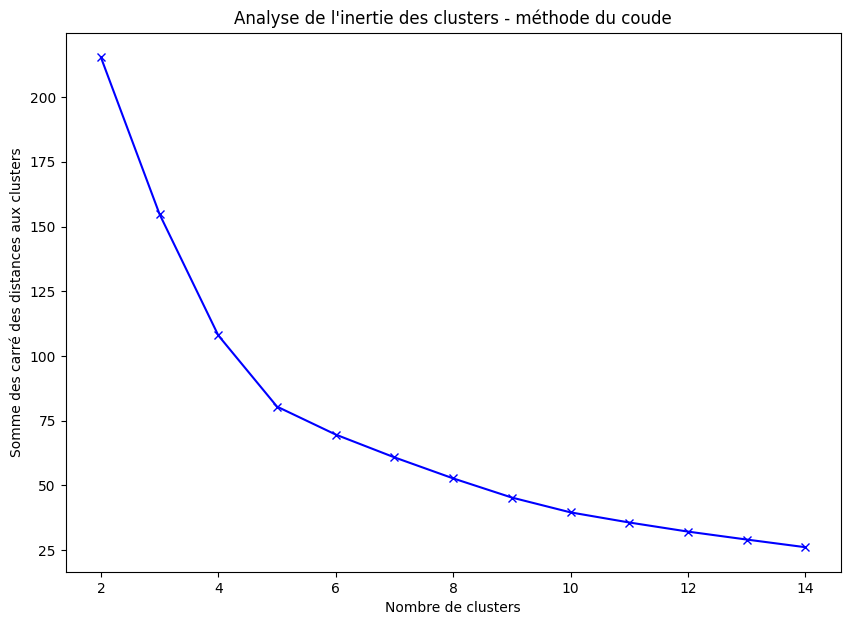

In [6]:
def elbow_chart(data, min_cluster=2, max_cluster=15, print_values=False):
    inertia={}
    for i in range(min_cluster, max_cluster):
        scaler = StandardScaler()
        kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)
        pipeline = make_pipeline(scaler, kmeans)
        pipeline.fit(data)
        inertia[i]=pipeline[1].inertia_
    # Show chart
    plt.figure(figsize=(10, 7))
    plt.plot(inertia.keys(), inertia.values(), 'bx-')
    plt.xlabel("Nombre de clusters")
    plt.ylabel("Somme des carré des distances aux clusters")
    plt.title("Analyse de l'inertie des clusters - méthode du coude")
    plt.show()
    # Show values
    if print_values is True:
        print(inertia)

elbow_chart(group_stat)

Grâce à la **méthode du coude (elbow method)**, on observe que le **nombre optimal de cluster** est **5**.

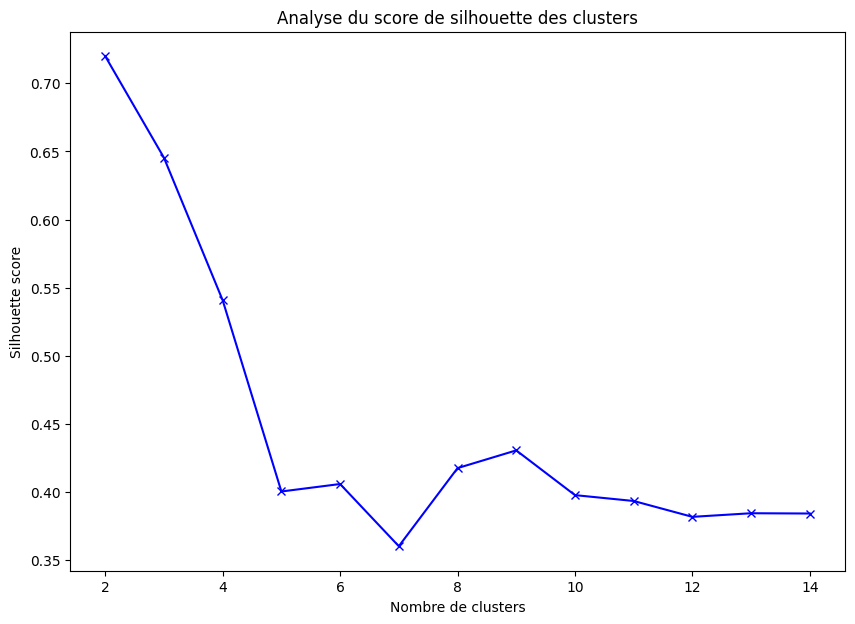

In [7]:
def silhouette_chart(data, min_cluster=2, max_cluster=15, print_values=False):
    silhouette={}
    for i in range(min_cluster, max_cluster):
        scaler = StandardScaler()
        kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)
        pipeline = make_pipeline(scaler, kmeans)
        predictions = pipeline.fit_predict(data)
        silhouette[i] = silhouette_score(data, predictions)
    # Show chart
    plt.figure(figsize=(10, 7))
    plt.plot(silhouette.keys(), silhouette.values(), 'bx-')
    plt.xlabel("Nombre de clusters")
    plt.ylabel("Silhouette score")
    plt.title("Analyse du score de silhouette des clusters")
    plt.show()
    # Show values
    if print_values is True:
        print(silhouette)
    
silhouette_chart(group_stat)

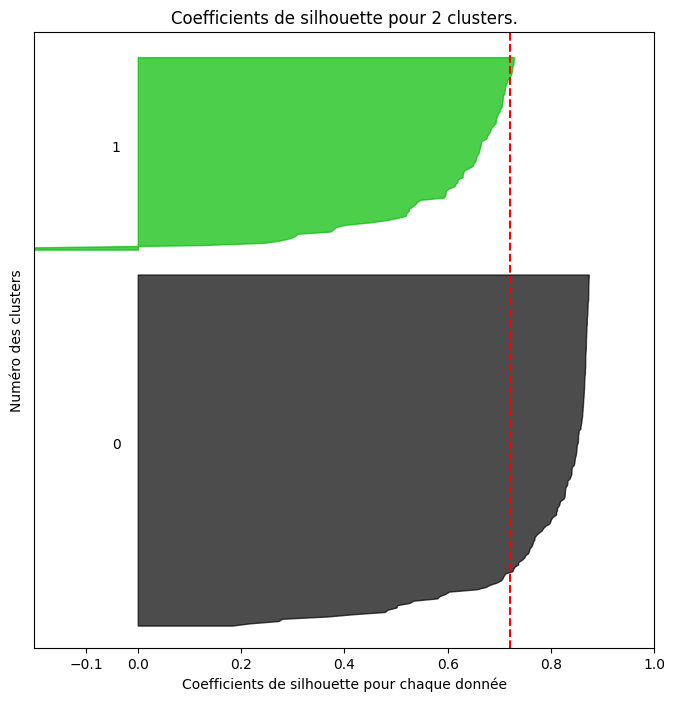

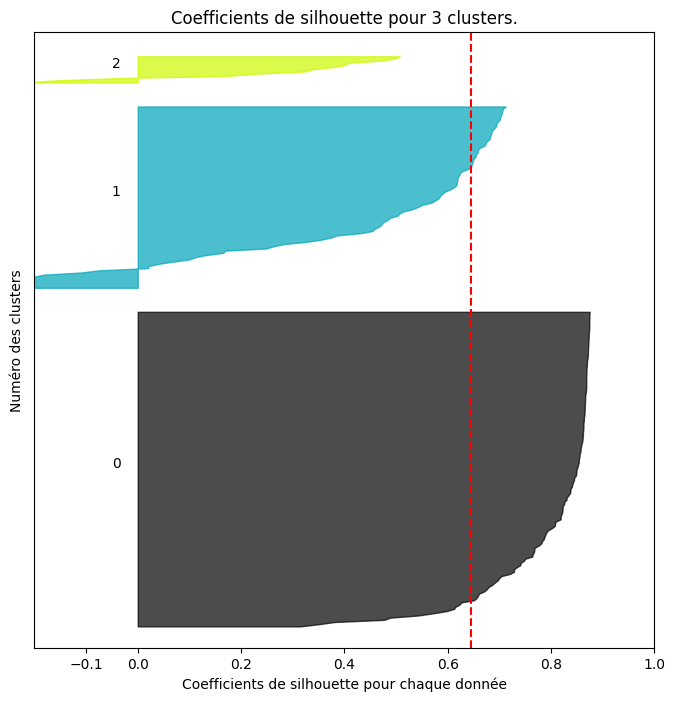

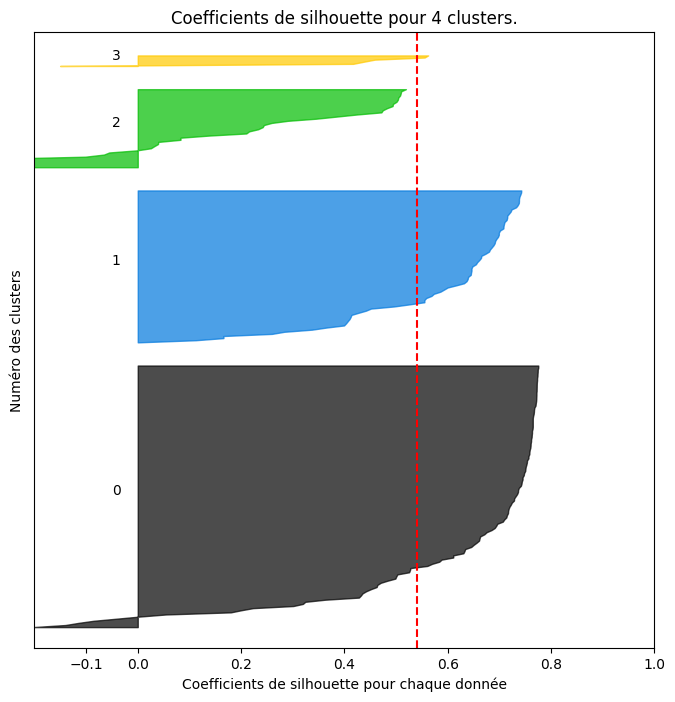

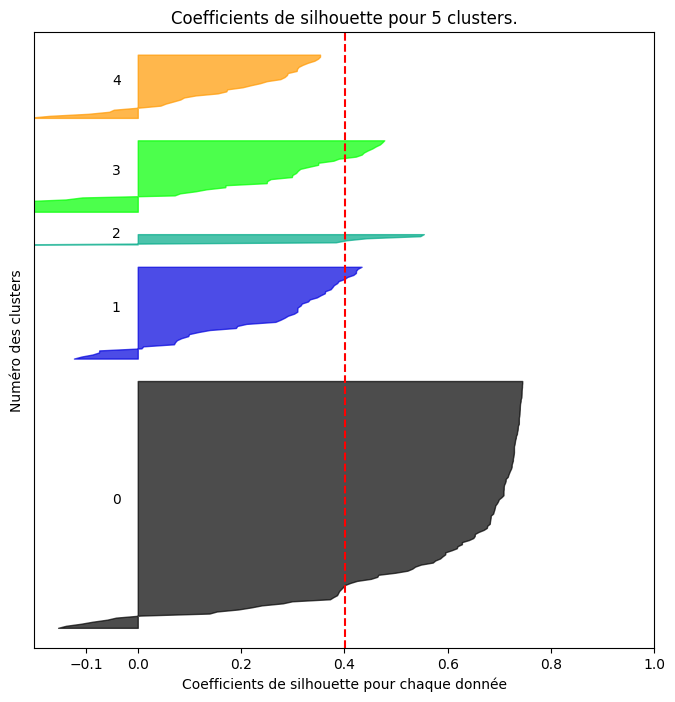

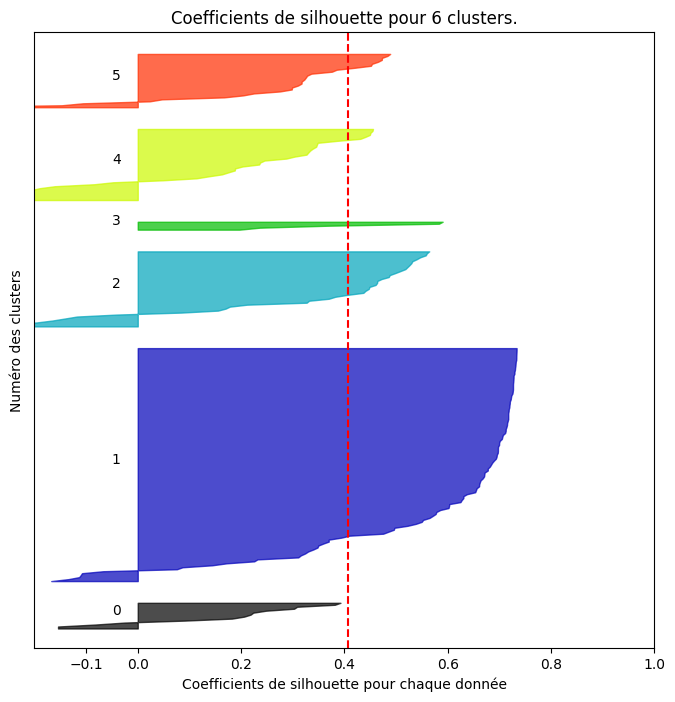

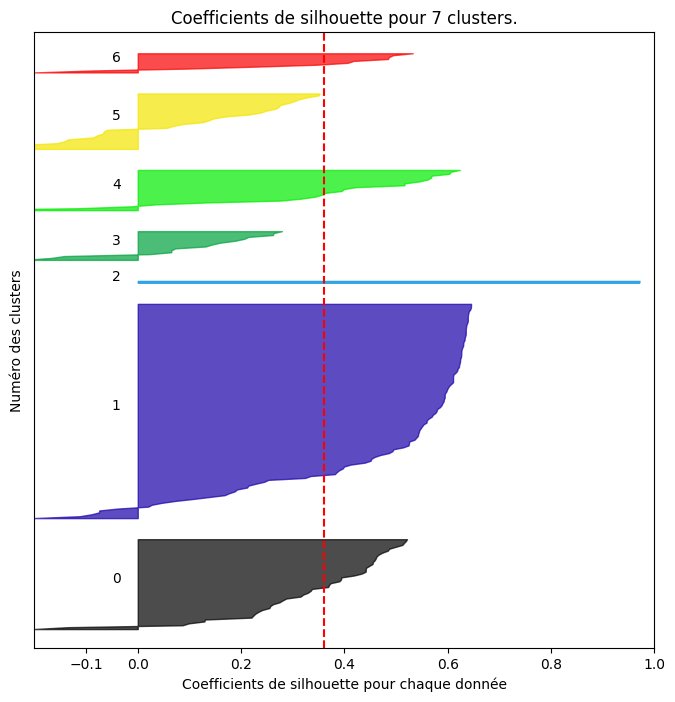

In [8]:
for n_clusters in range(2, 8):
    # Création du graphique
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    ax.set_xlim([-0.2, 1])
    ax.set_ylim([0, len(group_stat) + (n_clusters + 1) * 10])
    # Création du modèle de Kmeans
    scaler = StandardScaler()
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    pipeline = make_pipeline(scaler, kmeans)
    cluster_labels = pipeline.fit_predict(group_stat)
    # Coefficient de silhouette moyen
    silhouette_avg = silhouette_score(group_stat, cluster_labels)
    # Coefficient de silhouette individuel
    sample_silhouette_values = silhouette_samples(group_stat, cluster_labels)
    # Positionnement du début du cluster sur l'axe y
    y_lower = 10
    # Affichage des différents clusters
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        # Positionnement du cluster sur l'axe y
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        # Choix de la couleur du cluster
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        # Ajout du numéro des clusters
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Décalage de 10 pour une séparation entre les 2 clusters
        y_lower = y_upper + 10
    
    # Ajout du titre et des légendes
    ax.set_title(f"Coefficients de silhouette pour {n_clusters} clusters.")
    ax.set_xlabel("Coefficients de silhouette pour chaque donnée")
    ax.set_ylabel("Numéro des clusters")
    # Ligne verticale pour le coefficient de silhouette moyen
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    # Echelles des axes x et y
    ax.set_yticks([])
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [14]:
scaler = StandardScaler()
kmeans = KMeans(n_init=10, n_clusters = 2)
pipeline = make_pipeline(scaler, kmeans)
cluster_index = pipeline.fit_predict(group_stat)
group_stat["cluster_index"] = cluster_index
group_stat

,mean,median,std,cluster_index
Country,,,,
Afghanistan,14.045007,14.0900,9.225628,1
Africa,24.074203,24.8060,1.767355,0
Albania,12.610646,12.3015,6.992006,1
Algeria,22.985112,23.1135,7.710151,0
American Samoa,26.611965,26.6080,0.612077,0
...,...,...,...,...
Western Sahara,22.319818,22.3070,4.022152,0
Yemen,26.253597,26.6430,3.788625,0
Zambia,21.282956,21.9695,2.373674,0


In [15]:
fig = px.scatter(group_stat, x='mean', y='std', color="cluster_index", hover_data=[group_stat.index])
fig.show()

### 🥇 Clustering hiérarchique

- A partir de données calculées précédemment, effectuer un **clustering hiérarchique**. Afficher le **dendrogramme des données**. Valider le nombre de clusters trouvés avec l'algorithme de k-means. Ajouter un colonne au dataframe pour indiquer le **numéro du cluster de la prédiction** et afficher les données sur un graphique de **nuage de points** de la bibliothèque **Plotly**.

*Ressources :*

   - [scipy.cluster.hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)
   - [scipy.cluster.hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)
   - [scipy.cluster.hierarchy.fcluster](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html)

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

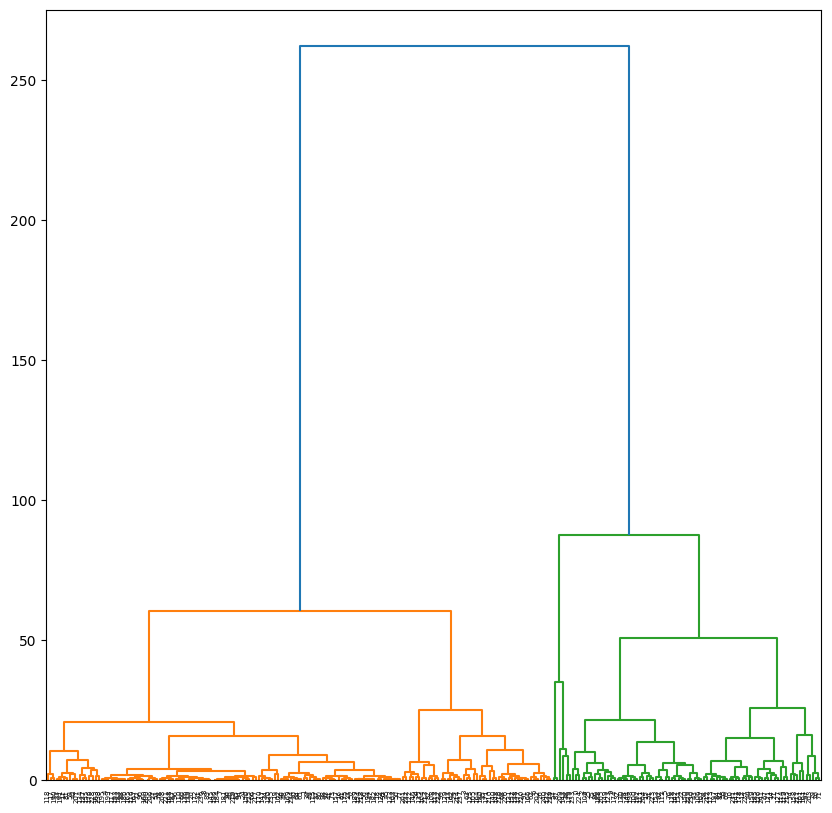

In [17]:
plt.figure(figsize=(10, 10))
linkage_data = linkage(group_stat, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [18]:
group_stat = df[["AverageTemperature", "Country"]].groupby("Country").agg(["mean", "median", "std"])
group_stat.columns = group_stat.columns.droplevel()
group_stat = group_stat.dropna()
group_stat["cluster_index"] = fcluster(linkage_data, 5, criterion="maxclust")

In [19]:
fig = px.scatter(group_stat, x='mean', y='std', color="cluster_index", hover_data=[group_stat.index])
fig.show()

## 🚀 Pour aller plus loin

- [Unsupervised learning - Scikit-learn](https://scikit-learn.org/stable/unsupervised_learning.html)

___
*👨‍🏫 [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management*
___
Source images d'illustration : Image Wikipedia